In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

In [3]:
wnba = pd.read_csv("wnba.csv")

In [6]:
wnba["Experience"].value_counts(dropna = False)

R     23
3     19
6     14
5     14
1     12
2     11
4     11
9     11
10     5
12     4
11     4
7      4
8      3
13     3
14     3
15     2
Name: Experience, dtype: int64

In [7]:
wnba["Experience"].dtype

dtype('O')

In [8]:
def category(x):
    if pd.isnull(x):
        return "Rookie"
    elif 0 < x <= 3:
        return "Little Experience"
    elif 3 < x <= 5:
        return "Experienced"
    elif 5 < x <= 10:
        return "Very Experienced"
    elif x > 10:
        return "Veteran"

In [9]:
pd.to_numeric(wnba["Experience"], errors = "coerce")

0       2.0
1      12.0
2       4.0
3       6.0
4       NaN
       ... 
138     6.0
139     9.0
140     2.0
141     8.0
142     2.0
Name: Experience, Length: 143, dtype: float64

In [12]:
wnba["Exp_ordinal"] = pd.to_numeric(wnba["Experience"], errors = "coerce").apply(category)

In [13]:
wnba["Exp_ordinal"].value_counts()

Little Experience    42
Very Experienced     37
Experienced          25
Rookie               23
Veteran              16
Name: Exp_ordinal, dtype: int64

In [28]:
# absolute frq
value = wnba["Exp_ordinal"].value_counts().iloc[[3,0,2,1,4]]

In [29]:
value

Rookie               23
Little Experience    42
Experienced          25
Very Experienced     37
Veteran              16
Name: Exp_ordinal, dtype: int64

In [35]:
# nominal, ordinal ---> Bar, pie

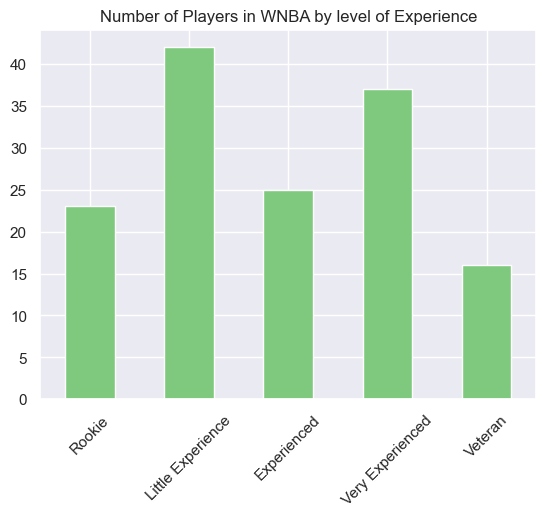

In [22]:
value.plot(kind="bar", rot = 45, colormap = plt.cm.Accent, title = "Number of Players in WNBA by level of Experience")

plt.show()

In [26]:
# relative frq
value_1 = (wnba["Exp_ordinal"].value_counts(normalize = True)*100).iloc[[3,0,2,1,4]]

In [27]:
value_1

Rookie               16.083916
Little Experience    29.370629
Experienced          17.482517
Very Experienced     25.874126
Veteran              11.188811
Name: Exp_ordinal, dtype: float64

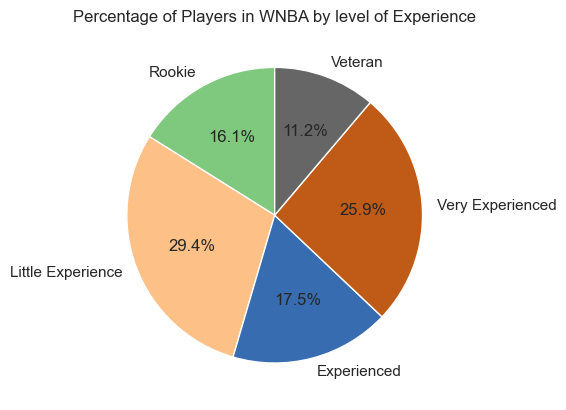

In [34]:
value.plot.pie(colormap = plt.cm.Accent, title = "Percentage of Players in WNBA by level of Experience",
              startangle = 90, autopct = "%.1f%%")
plt.ylabel("")
plt.show()

In [36]:
# Ratio, Interval --- > Hist

In [39]:
wnba["PTS"].value_counts(bins = 10)

(1.417, 60.2]     30
(60.2, 118.4]     24
(176.6, 234.8]    20
(118.4, 176.6]    17
(234.8, 293.0]    17
(351.2, 409.4]    10
(293.0, 351.2]     8
(409.4, 467.6]     8
(525.8, 584.0]     5
(467.6, 525.8]     4
Name: PTS, dtype: int64

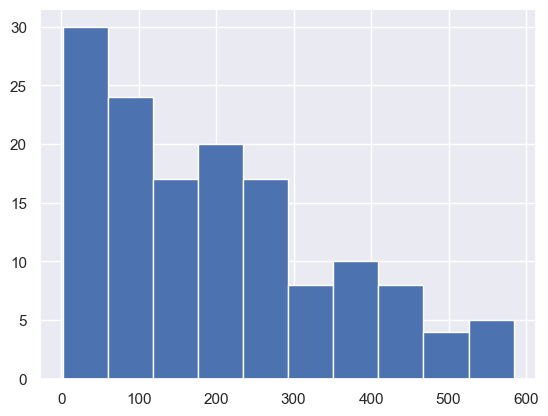

In [41]:
wnba["PTS"].hist()

plt.show()

In [44]:
value.index

Index(['Rookie', 'Little Experience', 'Experienced', 'Very Experienced',
       'Veteran'],
      dtype='object')

In [49]:
sorted(wnba["Pos"].unique())

['C', 'F', 'F/C', 'G', 'G/F']

<Axes: xlabel='Exp_ordinal', ylabel='count'>

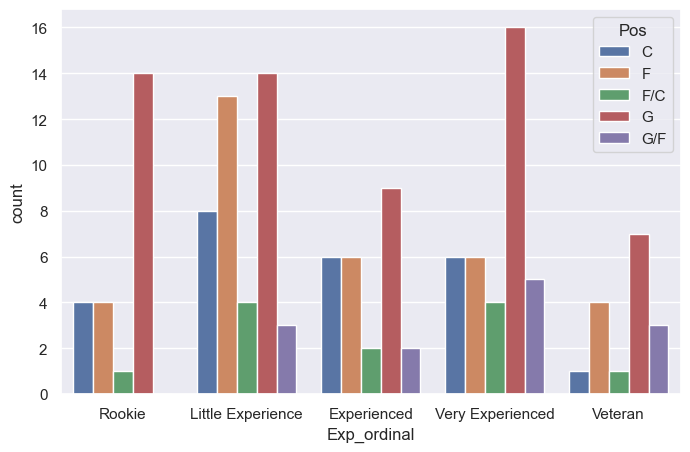

In [51]:
fig = plt.figure(figsize=(8,5))

sns.countplot(data = wnba, x = "Exp_ordinal", 
              order = ['Rookie', 'Little Experience', 'Experienced', 'Very Experienced','Veteran'],
             hue = "Pos", hue_order = ['C', 'F', 'F/C', 'G', 'G/F'])